# Principales Librerias en Python
----------------------------------------------------

En esta sección conoceremos algunas librerias con las que cuenta python las cuales nos ayudarán en ciertas operaciones

## 1. Libreria Random
-----------------------------

Este módulo contiene funciones para generar números aleatorios:

Puede ver más ejemplos en el siguiente [link](https://www.geeksforgeeks.org/python-random-module/#:~:text=Python%20Random%20module%20is%20an,a%20list%20or%20string%2C%20etc.)

In [6]:
import random

# Flotante aleatorio >= 0 y < 1.0
print(random.random())

0.4991225385886271


In [12]:
# Flotante aleatorio >= 1 y <10.0       
print(random.uniform(1,10))

# si quisieramos nros enteros en un rango de >=a y <=b
print(random.randint(1,100))

5.951974871370029
99


In [17]:
# Selección de un elemento de conjunto de elementos
lista_valores = [1,2,3,4, 'hola', 'x']

print(random.choice(lista_valores))

3


In [22]:
[random.randint(1,100) for i in range(10) ]

[72, 29, 4, 85, 26, 17, 84, 97, 17, 11]

## 2. Manipulación de Directorios
---------------------------

El módulo <code>os</code> nos permite tener un control sobre normbre de archivos y directorios del sistema operativo.


In [24]:
import os       # Nos permite manipular el sistema operativo
import shutil   # Nos permite copiar y mover archivos

In [25]:
# Ruta de Trabajo actual : Es aquella donde realizamos el trabajo actual

print( os.getcwd() )

C:\Users\gon_2\OneDrive - UNIVERSIDAD NACIONAL DE INGENIERIA\Desktop\PythonFundamentos\Modulo4


### Rutas Absolutas y Rutas Relativas

- Ruta Absoluta: Aquella que inicia desde el directorio raiz
- Ruta Relativa: Hace referencia a la posición relativa del directorio de trabajo actual


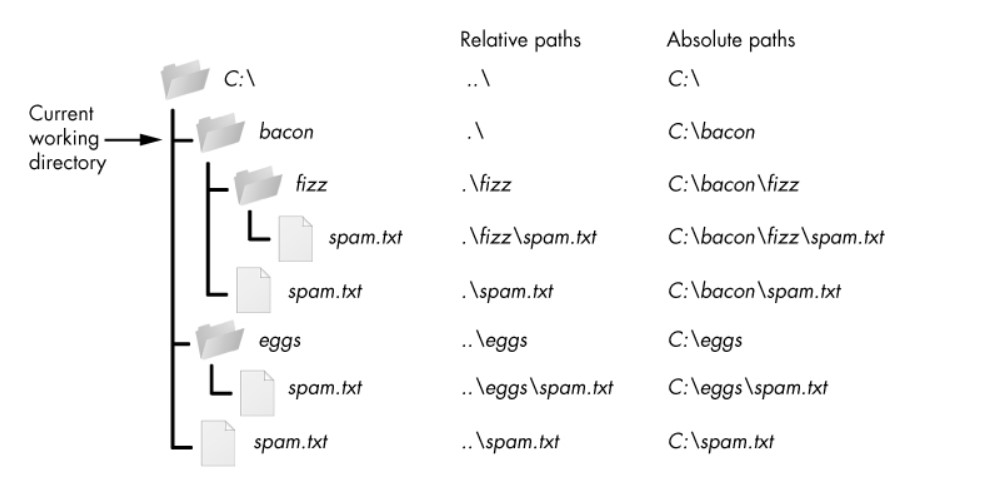<img src="./img/automating/relative_absolute_path.jpg">

In [26]:
# obteniendo ruta absoluta de ruta
os.path.abspath('./img')

'C:\\Users\\gon_2\\OneDrive - UNIVERSIDAD NACIONAL DE INGENIERIA\\Desktop\\PythonFundamentos\\Modulo4\\img'

In [ ]:
# '.' referencia a directorio actual
'./scripts'

# '..' retrocedo una carpeta y busco la carpeta 'modulo2'
'../Modulo2'

### Validando Existencia de Directorio o File

In [35]:
# Validando existencia de directorio

print( os.path.exists('C:\\Windows') )

# Comprobando si ruta es directorio
print( os.path.isdir(r'C:\Windows\System32'))#'C:\\Windows\\System32') )

print( os.path.isdir('./scripts') )
# Comprobando si ruta es file
print( os.path.isfile('./texto.txt'))

True
True
True
True


In [36]:
print('\nHola a todos')


Hola a todos


In [37]:
print(r'\nHola a todos')

\nHola a todos


### Otros Métodos de OS

In [30]:
# Lista elementos del directorio
os.listdir('./Ejercicios')

print(os.listdir())

['.ipynb_checkpoints', '1. Librerias.ipynb', '2. Manejo de Ficheros.ipynb', '3. Expresiones Regulares.ipynb', 'Ejercicios', 'img', 'regEx - la chuleta.pdf', 'scripts', 'src', 'texto.txt']


In [39]:
# chdir -> cambiar la posición sobre la que se encuentra python
os.chdir('./scripts/2.demos_files')

print(os.getcwd())

C:\Users\gon_2\OneDrive - UNIVERSIDAD NACIONAL DE INGENIERIA\Desktop\PythonFundamentos\Modulo4\scripts\2.demos_files


### Métodos de Copiado de Archivos (shutil)

In [38]:
if not os.path.isdir('./scripts'): 
    os.mkdir('./scripts') # mkdir -> crea una carpeta en una ruta dada
    os.mkdir('./scripts/2.demos_files')

In [43]:
# Copiando archivos de un directorio a una partera
#  copio de <ruta origen> a <ruta destino>
path = r'C:\Users\gon_2\OneDrive - UNIVERSIDAD NACIONAL DE INGENIERIA\Desktop\PythonFundamentos\Modulo4\scripts\2.demos_files'
shutil.copy(f'{path}\src\cat.jpg', r'./dts/')
shutil.copy(r'./src/cat.jpg', r'./dts/cat_miua.jpg')

# shutil.move()

'./dts/cat_miua.jpg'

## 3. Manipulando Elementos Web
----------------------

**Requests es una librería Python que facilita enormemente el trabajo con peticiones HTTP**. Antes o después, en algún proyecto, es posible que tengas que hacer peticiones web, ya sea para consumir un API, extraer información de una página o enviar el contenido de un formulario de manera automatizada. Si es así, Python requests es tu gran aliada.

<center>
    <img src='./img/automating/web.png' width="500" height="600">
</center>

In [45]:
# instalando libreria

# pip install <nombre_libreria>  # las busco en https://pypi.org/project/requests/
# para desinstalar pip uninstall <nombre_libreria>
# pip install --upgrade   # actualizar libreria

# instalar libreria en jupyter '!'

!pip install requests 

### 3.1 Web Scraping

Conjunto de técnicas que permitirán la obtención de datos de una página web

<img src='https://miro.medium.com/max/1200/1*kfOsUxggG5wDbDcxgC0Uwg.png'>

In [47]:
# libreria que permitirá la obtención de datos web
!pip install lxml 

In [48]:
import requests
from lxml import html

In [49]:
url = 'https://www.wikipedia.org/'

# REQUERIMIENTO AL SERVIDOR
respuesta = requests.get(url)

# PARSEO DEL ARBOL HTML QUE RECIBO COMO RESPUESTA CON LXML
parser = html.fromstring(respuesta.text)


# EXTRACCION DE TODOS LOS IDIOMAS POR CLASE
idiomas = parser.find_class('central-featured-lang')

for idioma in idiomas:
    print(idioma.text_content())



English
6 458 000+ articles




æ¥æ¬èª
1 314 000+ è¨äº




EspaÃ±ol
1 755 000+ artÃ­culos




Ð ÑÑÑÐºÐ¸Ð¹
1 798 000+ ÑÑÐ°ÑÐµÐ¹




Deutsch
2 667 000+ Artikel




FranÃ§ais
2 400 000+ articles




Italiano
1 742 000+ voci




ä¸­æ
1 256 000+ æ¡ç® / æ¢ç®




à²à²¨à³à²¨à²¡
27 000+ 




PortuguÃªs
1 085 000+ artigos




### 3.2 Introducción al uso de APIs

- Muchos sitios web, generan sus propias APIs a manera de facilitar la comunicación con diversos sistemas de información
- A diferencia del web scraping convencional, las APIs son mucho más faciles de utilizar
- Comunmente se utilizá el formato JSON como formato de intercambio de datos



<center>

  <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwTt3CMQQ7JigO6qys2jwVBEToNZahbZL5AA&usqp=CAU' width="500" height="600">

</center>

#### Json
    
JSON (JavaScript Object Notation) es un formato ligero de intercambio de datos. JSON es de fácil lectura y escritura para los usuarios

- Parecido a un diccionario


<img src='https://addons.mozilla.org/user-media/previews/full/29/29967.png?modified=1622132517'>


In [13]:
# https://www.youtube.com/watch?v=u2Ms34GE14U&list=RDCMUCP15FVAA2UL-QOcGhy7-ezA&start_radio=1&rv=u2Ms34GE14U&t=31&ab_channel=EDteam
# https://www.youtube.com/watch?v=QsrWtqnQGMc&ab_channel=WebReactivabyDani

In [50]:
import requests

url = 'https://api.apis.net.pe/v1/tipo-cambio-sunat' #tipo cambio sunat

# https://apis.net.pe/api-tipo-cambio.html

response = requests.get(url)

response.json() # nos brinda la información en formato JSON

{'compra': 3.765,
 'venta': 3.778,
 'origen': 'SUNAT',
 'moneda': 'USD',
 'fecha': '2022-06-12'}

In [51]:
data = response.json()

In [53]:
data['compra']

3.765

In [54]:
data = response.json()

# obteniendo tipo cambio

dolar_compra = data['compra']
dolar_venta = data['venta']

print(dolar_compra * 10) # costo compra dolar
print(dolar_venta * 10) # costo venta dolar

37.65
37.78


#### Ejercicio:

Utilice el siguiente API para obtener del clima para obtener los valores de temperatura en grados C y F, asi como los valores de temperatura y precipitación en la ciudad e lima.

url = https://weatherdbi.herokuapp.com/data/weather/lima


In [55]:
# dar formato a json -> https://pinetools.com/es/formatear-json

In [56]:
import requests

In [57]:
url = "https://weatherdbi.herokuapp.com/data/weather/lima"

In [58]:
r = requests.get(url)

In [59]:
r.status_code # 200 -> ok 

200

In [62]:
data = r.json()
data

{'region': 'Lima, OH',
 'currentConditions': {'dayhour': 'Sunday 11:00 AM',
  'temp': {'c': 24, 'f': 76},
  'precip': '8%',
  'humidity': '69%',
  'wind': {'km': 10, 'mile': 6},
  'iconURL': 'https://ssl.gstatic.com/onebox/weather/64/partly_cloudy.png',
  'comment': 'Mostly cloudy'},
 'next_days': [{'day': 'Sunday',
   'comment': 'Scattered thunderstorms',
   'max_temp': {'c': 26, 'f': 79},
   'min_temp': {'c': 19, 'f': 66},
   'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/rain_s_cloudy.png'},
  {'day': 'Monday',
   'comment': 'Scattered thunderstorms',
   'max_temp': {'c': 31, 'f': 87},
   'min_temp': {'c': 23, 'f': 73},
   'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/rain_s_cloudy.png'},
  {'day': 'Tuesday',
   'comment': 'Mostly sunny',
   'max_temp': {'c': 36, 'f': 97},
   'min_temp': {'c': 25, 'f': 77},
   'iconURL': 'https://ssl.gstatic.com/onebox/weather/48/partly_cloudy.png'},
  {'day': 'Wednesday',
   'comment': 'Mostly sunny',
   'max_temp': {'c': 37, 'f': 98

In [63]:
data.keys()

dict_keys(['region', 'currentConditions', 'next_days', 'contact_author', 'data_source'])

In [68]:

# 
temp = data['currentConditions']["temp"]

c = temp['c']
f = temp['f']

print(c, f)


24 76


#### 3.3 Descarga de Archivos Web

Los archivos como imagenes o documentos publicados en sitios web es posible descargarlos mediante la libreria Requests

In [74]:
# Ejemplo
#-------------------

"""
Imaginemos que quisieramos obtener una imagen situada en el siguiente sitio web.

https://es.wikipedia.org/wiki/Canis_familiaris
"""


url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Coat_types_3.jpg/800px-Coat_types_3.jpg'

url = 'http://www2.sunat.gob.pe/padron_reducido_ruc.zip'
response = requests.get(url)

with open('data_sunat.zip', 'wb') as f:
    f.write(response.content)
    pass

In [72]:
os.chdir(r'C:\Users\gon_2\OneDrive - UNIVERSIDAD NACIONAL DE INGENIERIA\Desktop\PythonFundamentos\Modulo4')

In [70]:
response.content

b'\xff\xd8\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00